# Simple pyosys synthesis example


In [22]:
import sys
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 278 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.7 MB/s  eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=940948041d5673eff5d56186ec38ef47193ea8820d5d0280bf9428a27885180d
  Stored in directory: /home/jovyan/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [6]:
import sys

sys.path.append("/usr/lib/python3.7/dist-packages")
sys.path.append("/home/jovyan")
sys.path.append("/home/jovyan/.local/lib/python3.7/site-packages")


Setting context <myhdl.conversion.yshelper.Design object at 0x7ff6a1bad3d0>
insert key test_1_8_8
INFER INTERFACE for test
Analyze signals for < Instance test >
New Name a <= a (a)
New Name b <= b (b)
New Name clk <= clk (clk)
CREATE Module: 'test'
INFER INTERFACE for test
Adding module with name: test_1_8_8
TOP LEVEL SIGNALS
clk
a
b
---- DONE ----
# of block arguments: 3
ARG clk
	Wire FLOATING clk, parent clk
ARG a
	Wire IN a, parent a, origin: None
ARG b
	Wire OUT (wire) b, parent: b, driver: test
----- PARENT/LOCAL CONTEXT -----
PARENT Wire a type <class 'myhdl._intbv.intbv'>, init: 0
PARENT Wire b type <class 'myhdl._intbv.intbv'>, init: 0
PARENT Wire clk type <class 'bool'>, init: 0
CONVERT_RTL instance 'test' 
CONVERT_RTL tree >>>>>> 'TEST_XOR_ASSIGN' 
dst: 8  src: 8
OUTPUTS of TEST_XOR_ASSIGN
	b
INPUTS
	a
VISIT INSTANCES
DONE instancing submodules
Display...


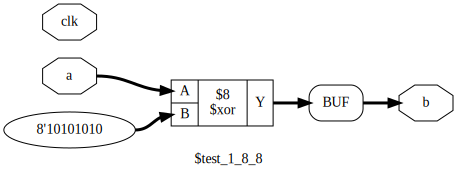

In [7]:

import pydotplus
import graphviz

from myhdl.conversion import yshelper

from myhdl import *

@block
def test(clk, a, b):
    @always_comb
    def xor_assign():
        b.next = a ^ 0xaa

    return instances()

a, b = [ Signal(intbv()[8:]) for i in range(2) ]
clk = Signal(bool())

design = yshelper.Design("test")
inst = test(clk, a, b)
inst.convert("yosys_module", design, name="test", trace=True)
design.display_rtl()

import graphviz

with open("test.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)

# pydot_gfx = pydotplus.graph_from_dot_file("test.dot")

#from IPython.display import Image

#Image(pydot_gfx.create_png())
#design.display_rtl() # Show dot graph